In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [ ]:
telco = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [ ]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
del telco['customerID']
telco['Churn'].replace(to_replace='Yes', value=1,inplace=True)
telco['Churn'].replace(to_replace='No',  value=0,inplace=True)

In [ ]:
telco.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


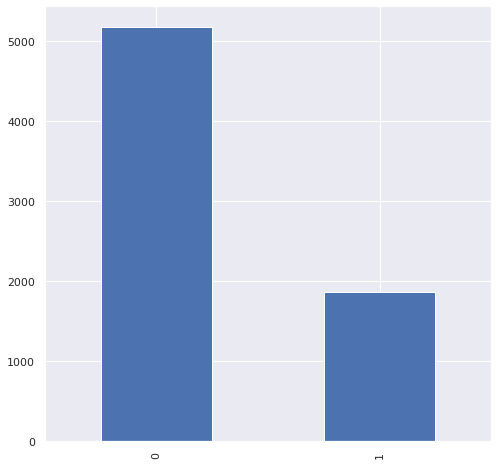

In [ ]:
telco['Churn'].value_counts().plot(kind="bar")

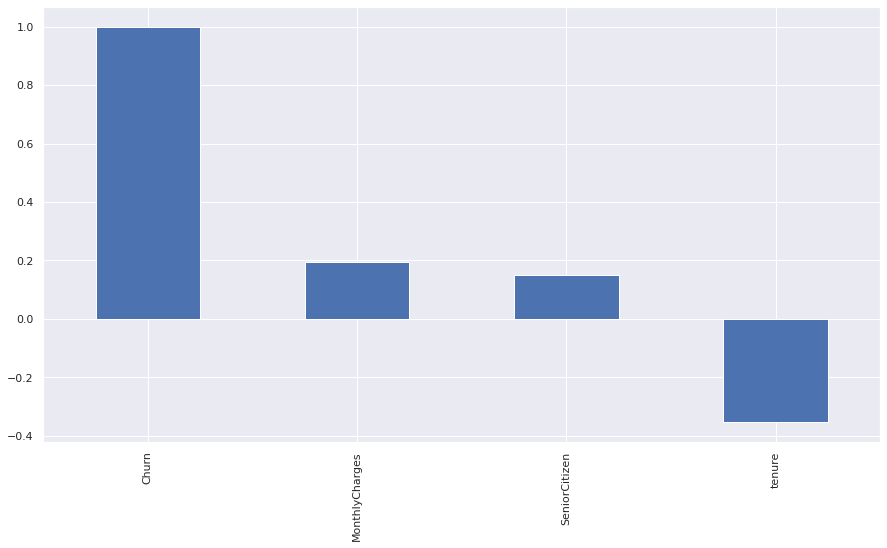

In [ ]:
plt.figure(figsize=(15,8))
telco.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
telco['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
telco.loc[ telco['TotalCharges'] == ' ', 'TotalCharges'] = 0
telco["TotalCharges"] = telco["TotalCharges"].astype("float64")

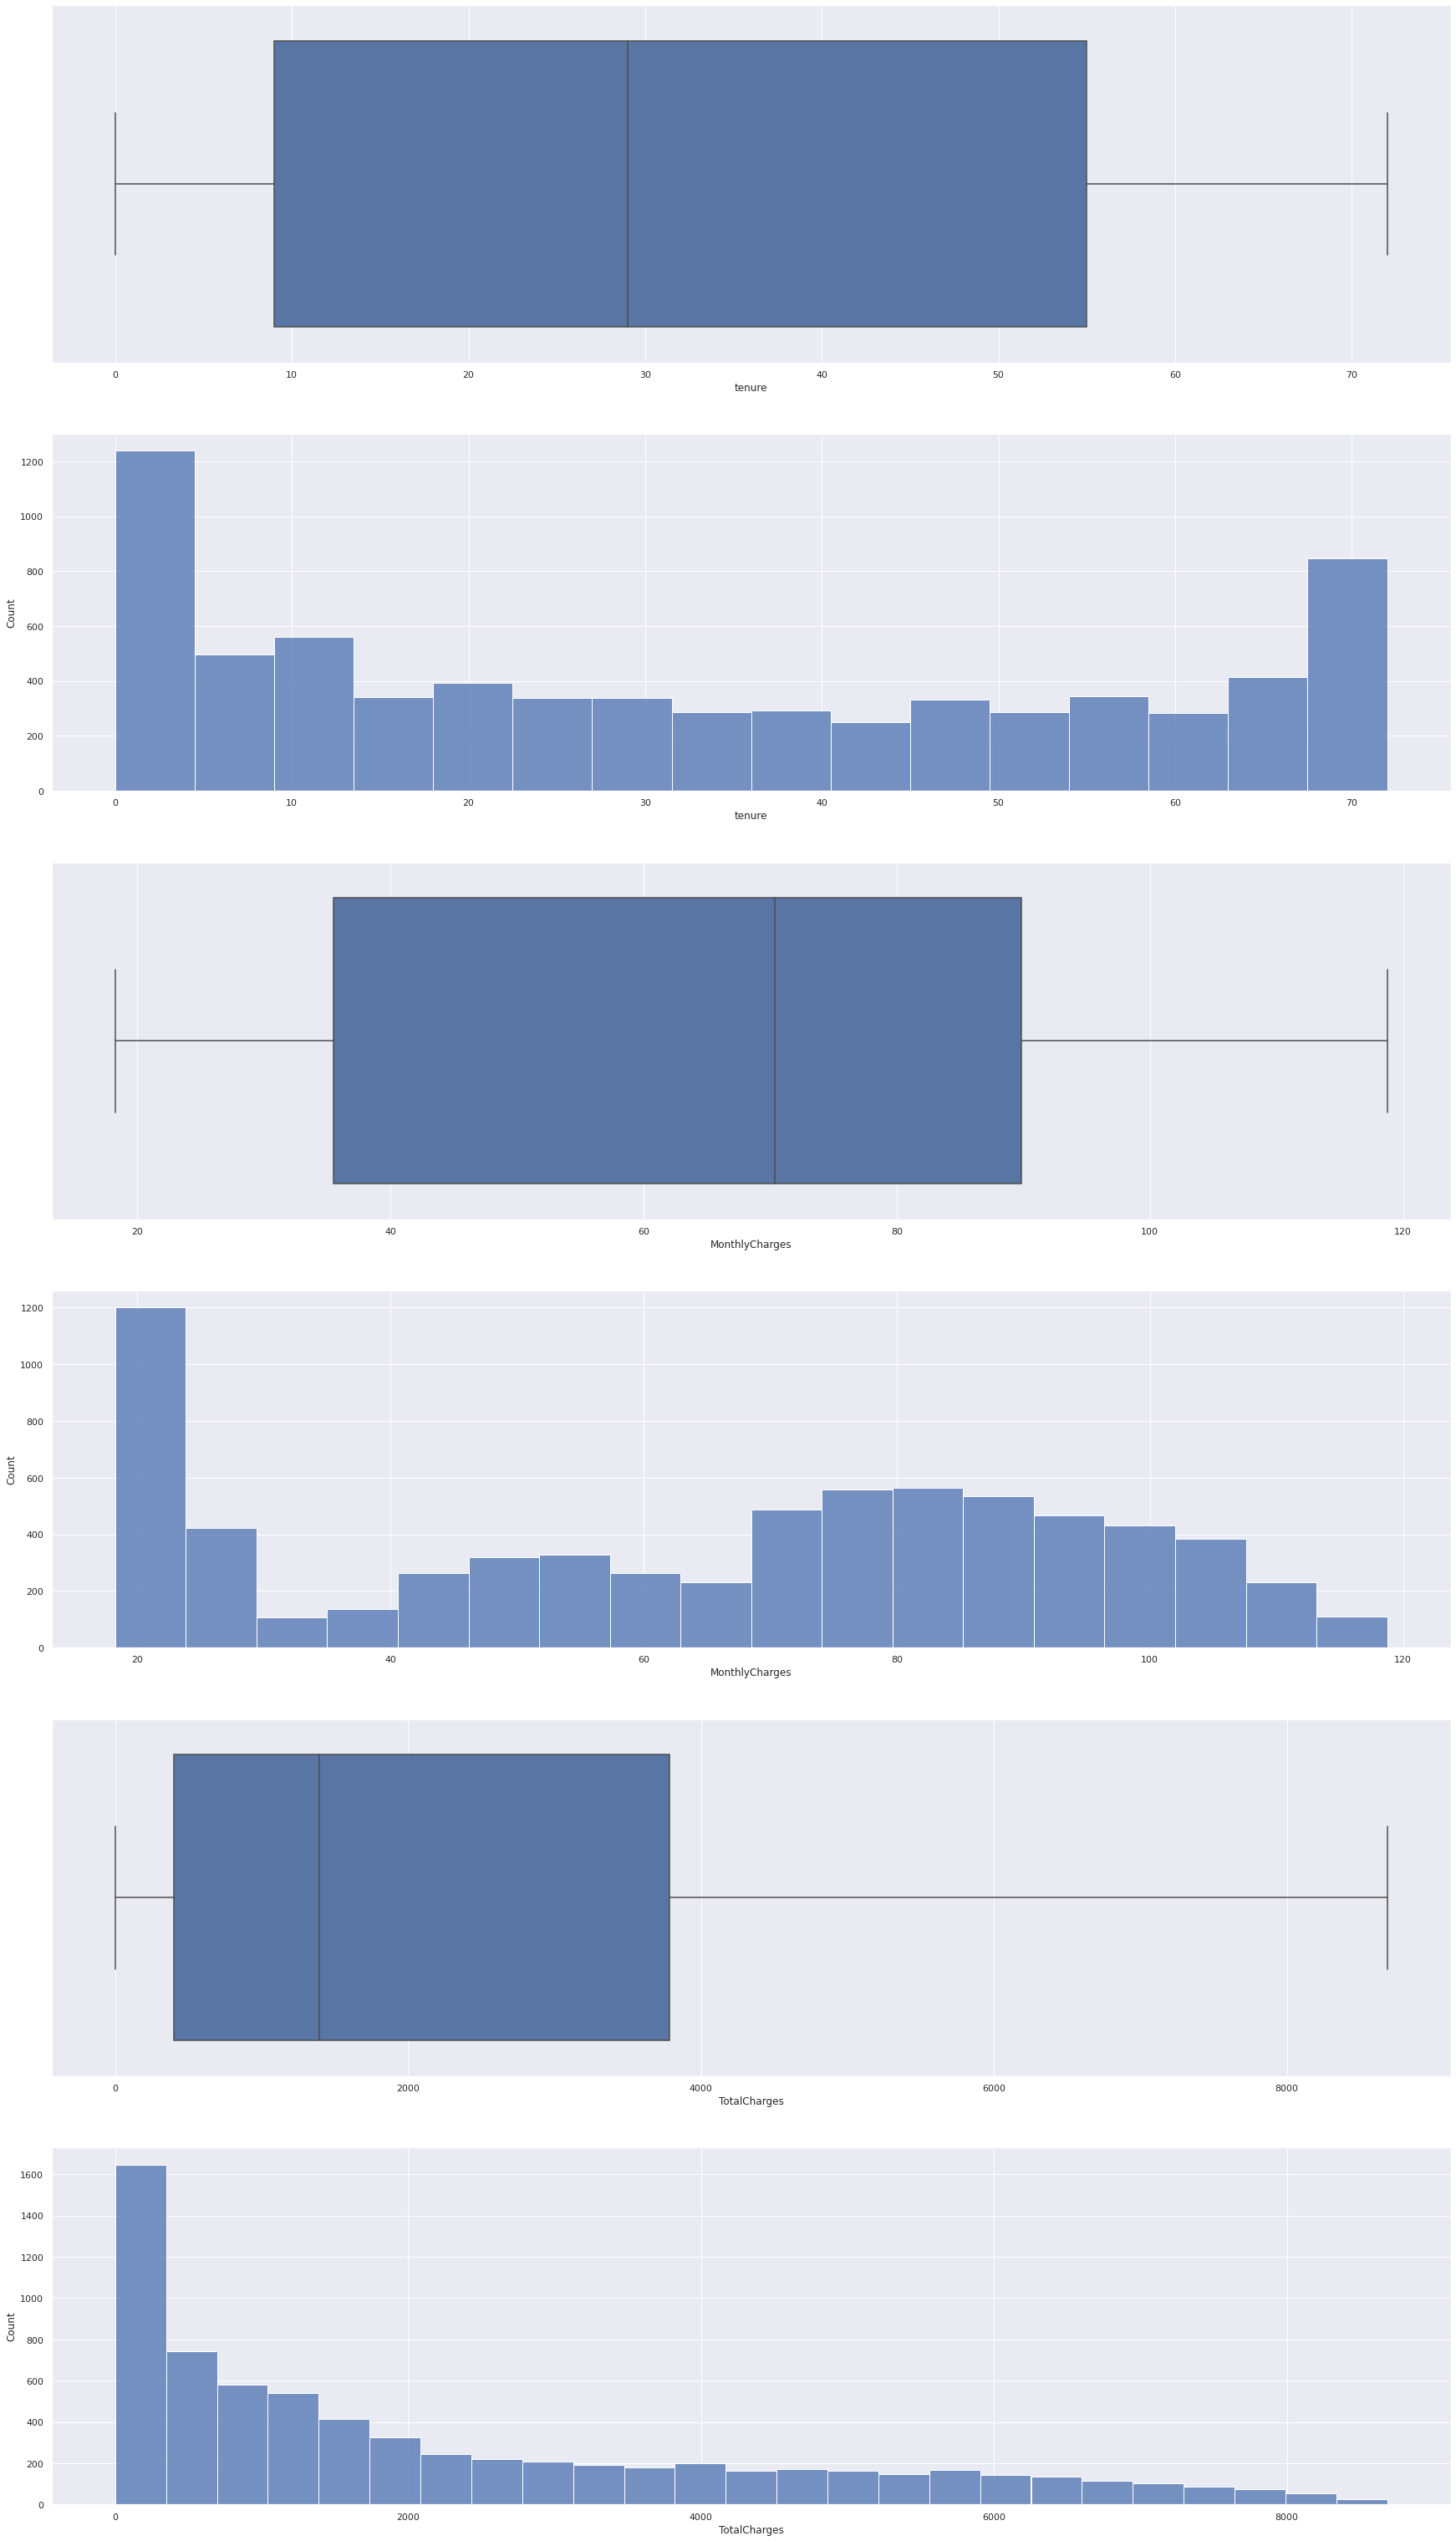

In [ ]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=telco, x="tenure", ax=ax[0])
g=sns.histplot(data=telco, x="tenure", ax=ax[1])


g=sns.boxplot(data=telco, x="MonthlyCharges", ax=ax[2])
g=sns.histplot(data=telco, x="MonthlyCharges", ax=ax[3])


g=sns.boxplot(data=telco, x="TotalCharges", ax=ax[4])
g=sns.histplot(data=telco, x="TotalCharges", ax=ax[5])

- For both numerical variables, tenure and TotalCharges the Churn follows the same pattern, many customers leave very early and with small total charges respectively and compared to the rest of their respective populations.

- The opposite happens with the MOnthlyCharges, customers who Churn, will leave the company when the monthly charges are rising above 80 dollars.

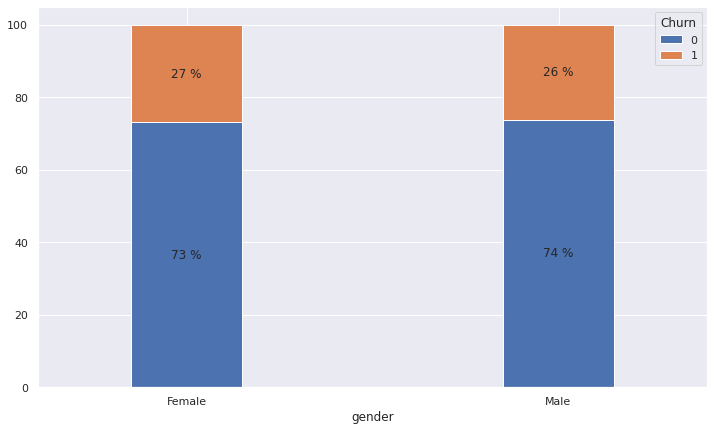

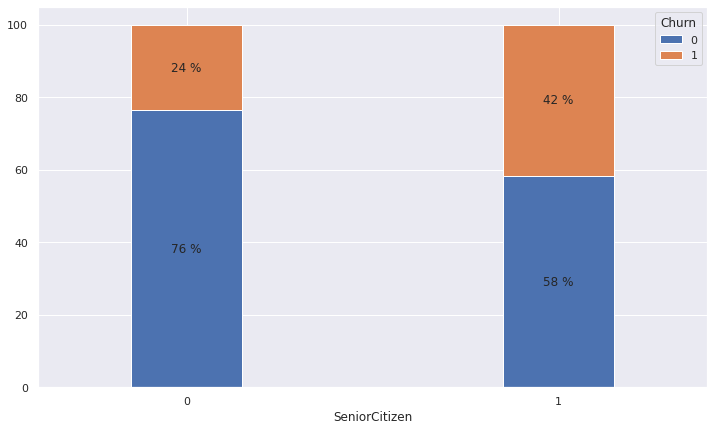

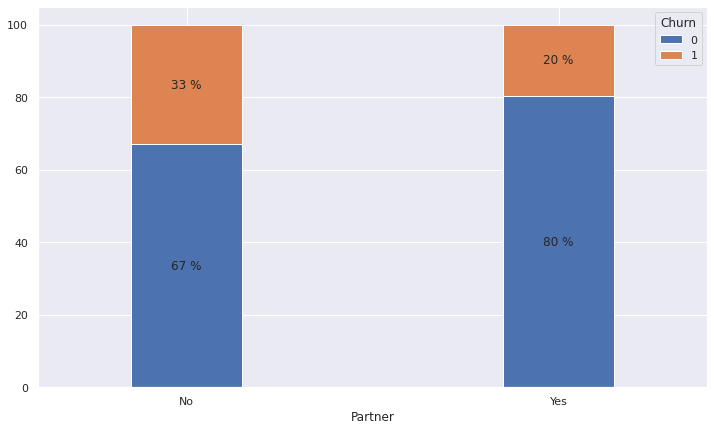

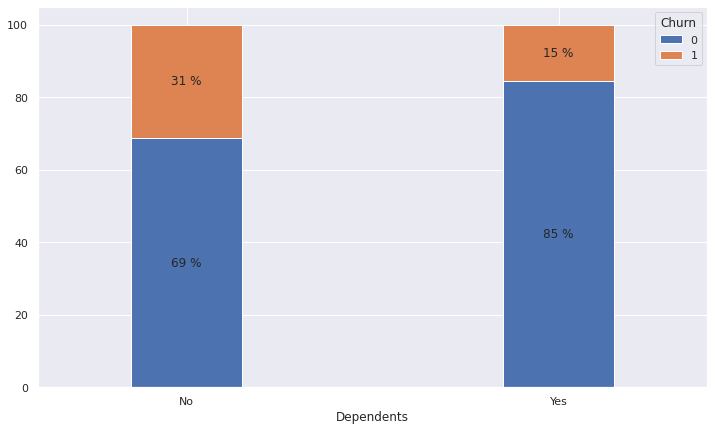

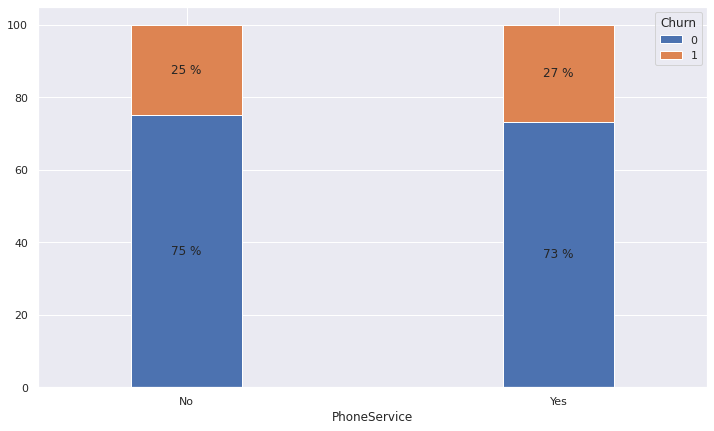

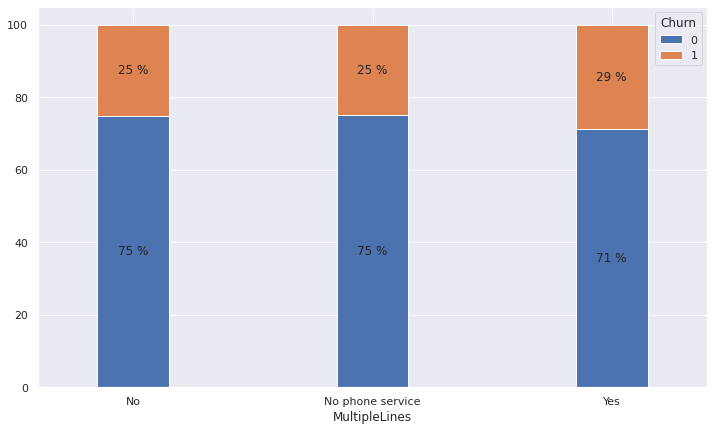

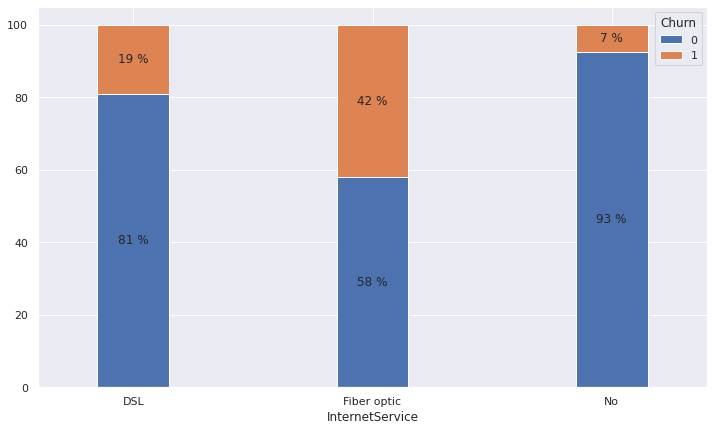

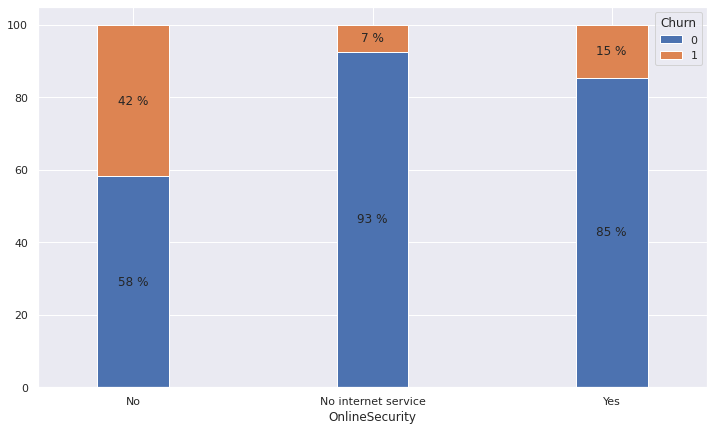

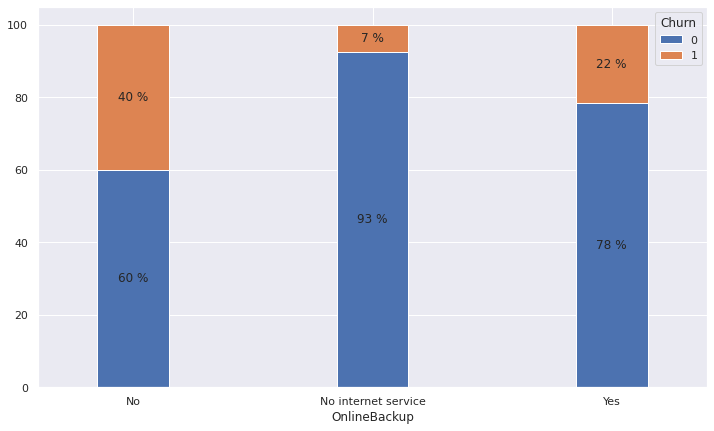

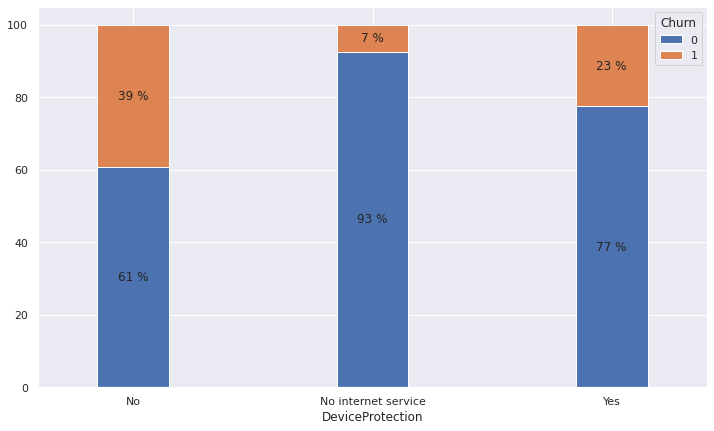

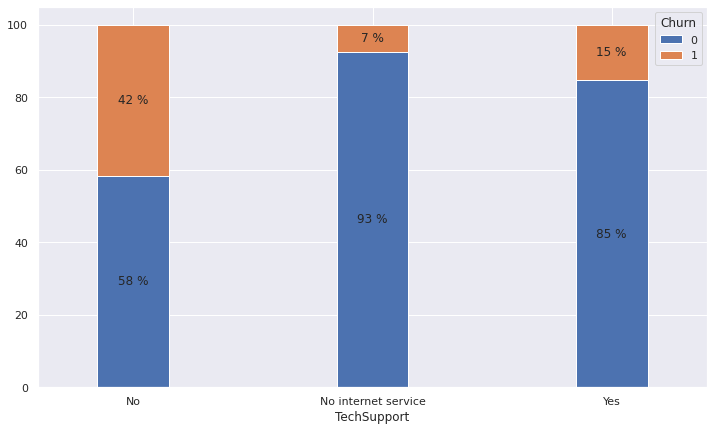

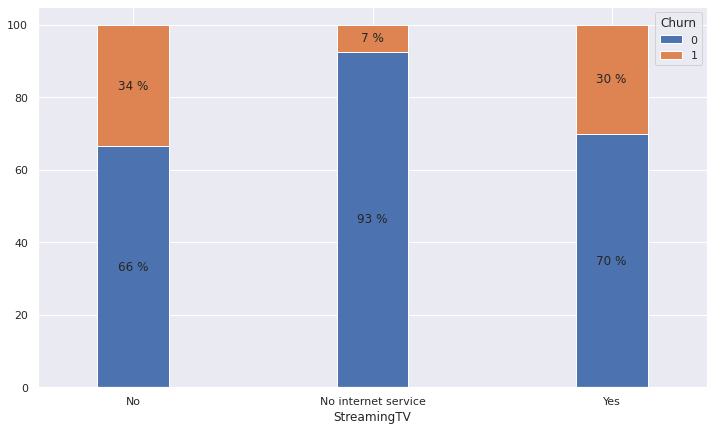

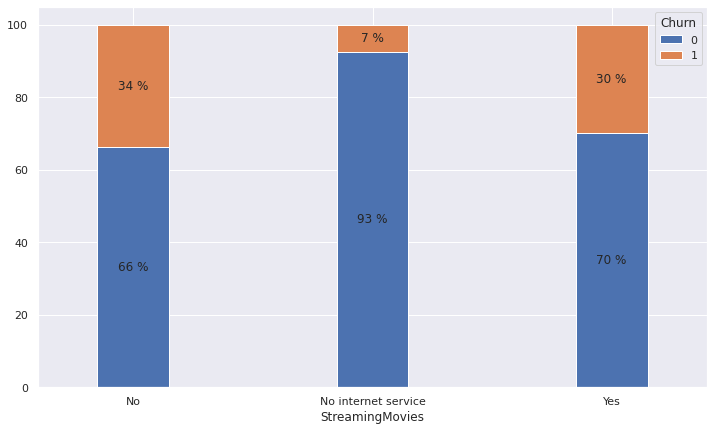

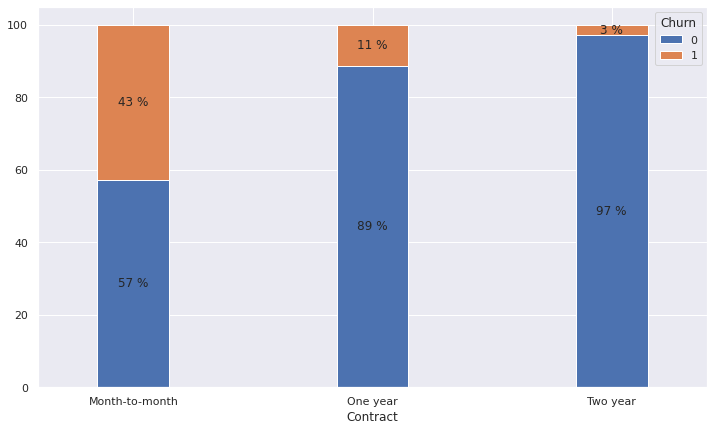

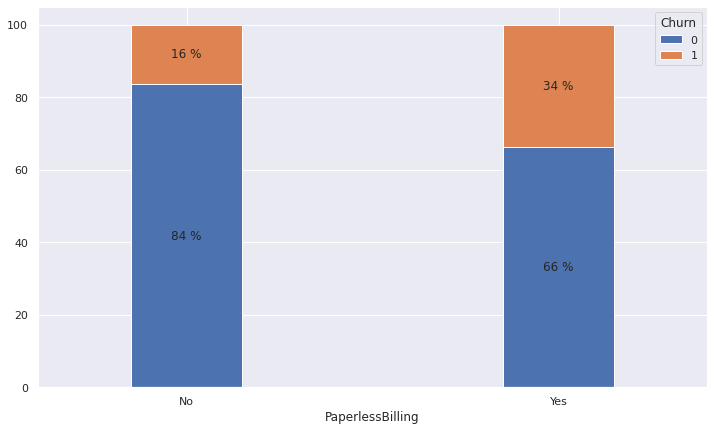

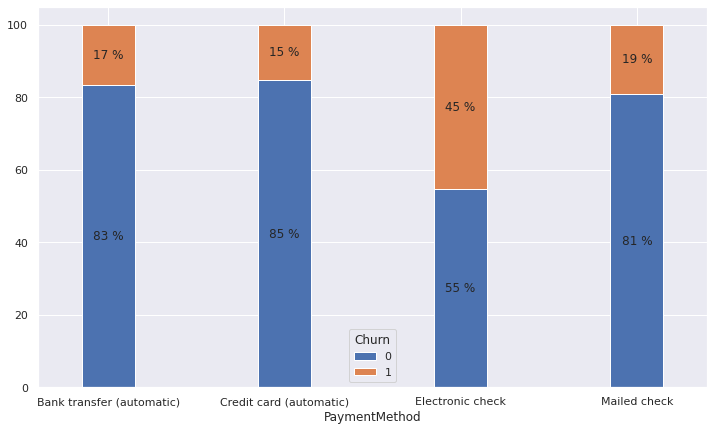

In [ ]:
sns.set(font_scale=1)
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for i in range(len(categorical_variables)):
    
    counts = telco.groupby([categorical_variables[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

In [ ]:
telco_dummies = pd.get_dummies(telco[categorical_variables])

# adding the numerical features
telco_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = telco[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
telco_dummies.head(3)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,34,56.95,1889.50
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,2,53.85,108.15


In [ ]:
telco_dummies['Churn'] = telco['Churn']
telco_dummies.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,2,70.70,151.65,1


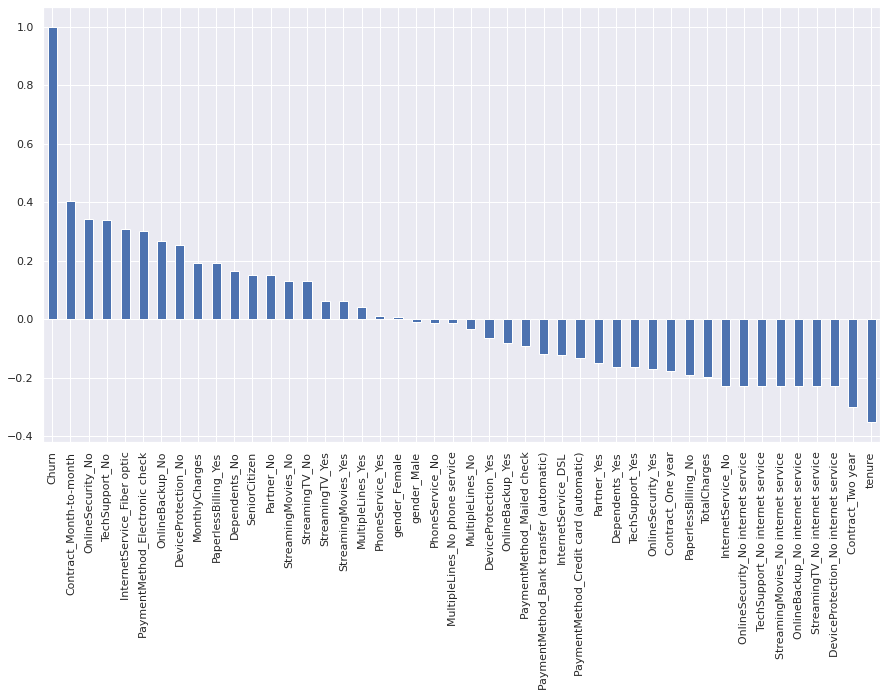

In [ ]:
plt.figure(figsize=(15,8))
telco_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

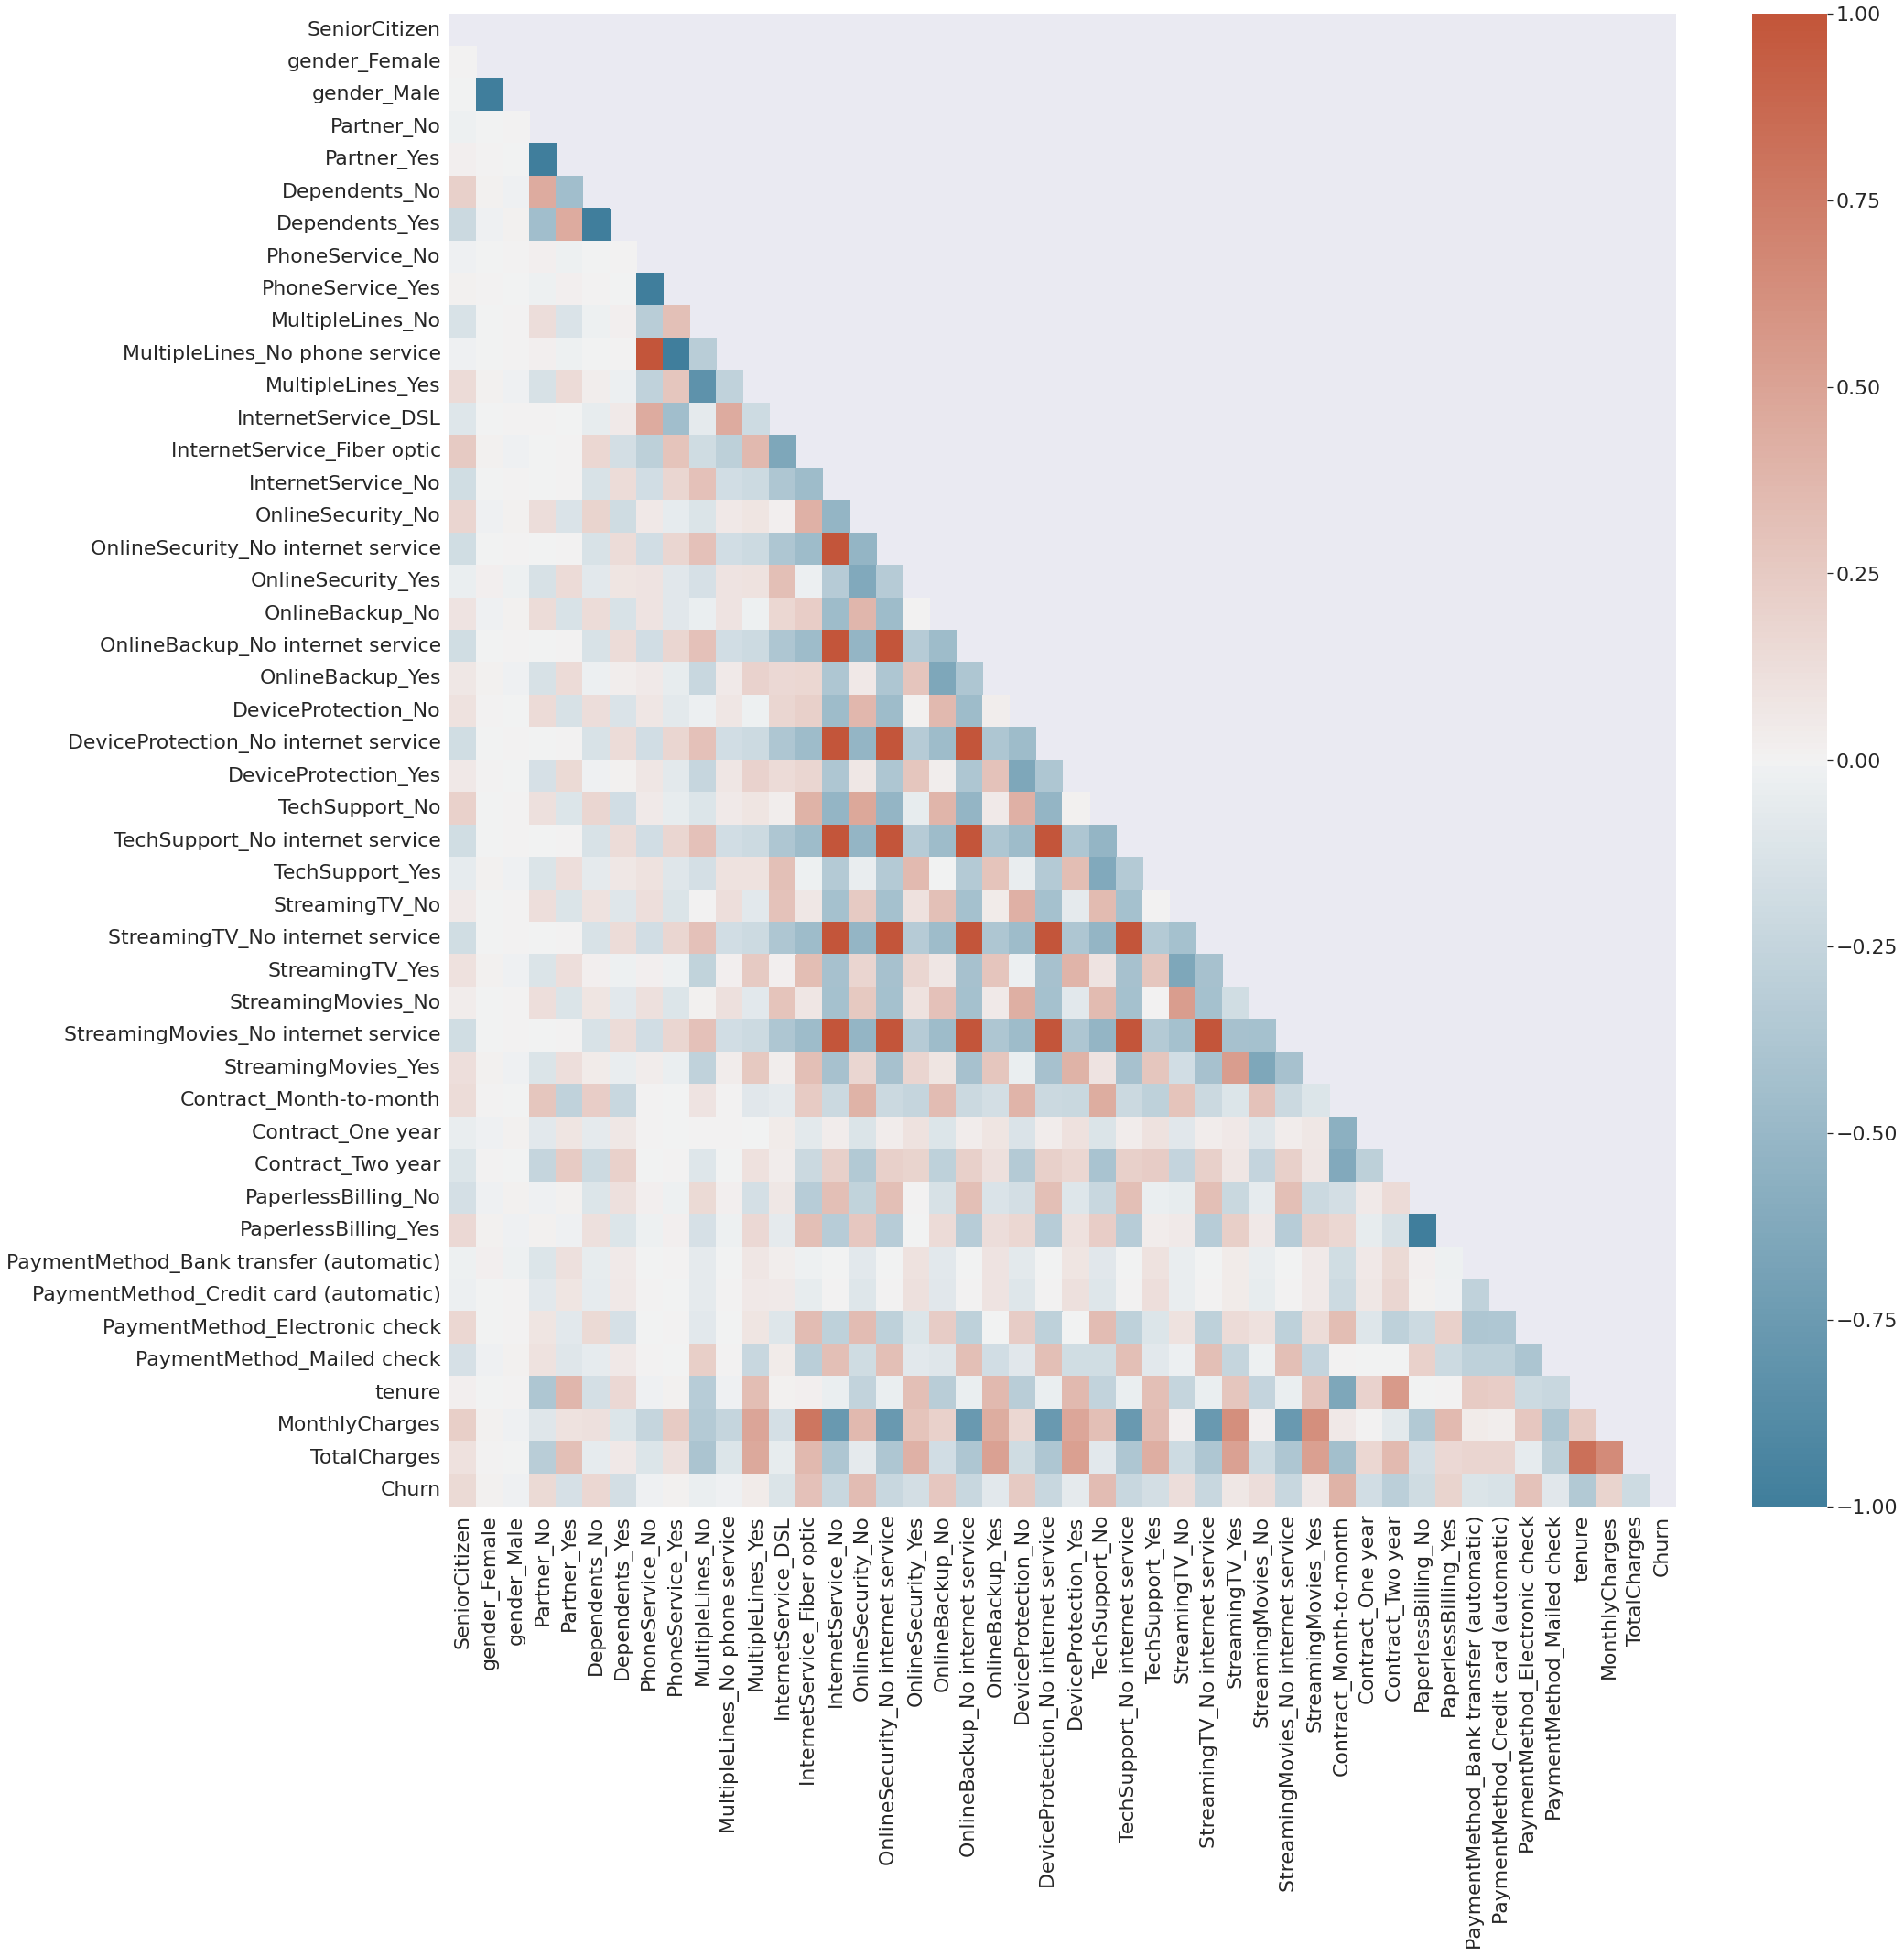

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(30,30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(telco_dummies.corr(), dtype=bool))
sns.heatmap(telco_dummies.corr(), mask=mask, cmap=cmap)

In [ ]:
telco_train = telco_dummies

In [ ]:
telco_train.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,2,70.70,151.65,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = telco_dummies['Churn'].values
X = telco_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8059630856601988


AxesSubplot(0.125,0.125;0.775x0.755)


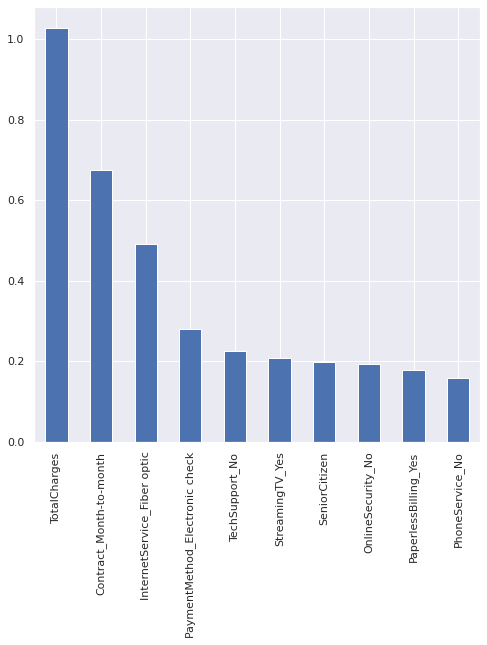

In [ ]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


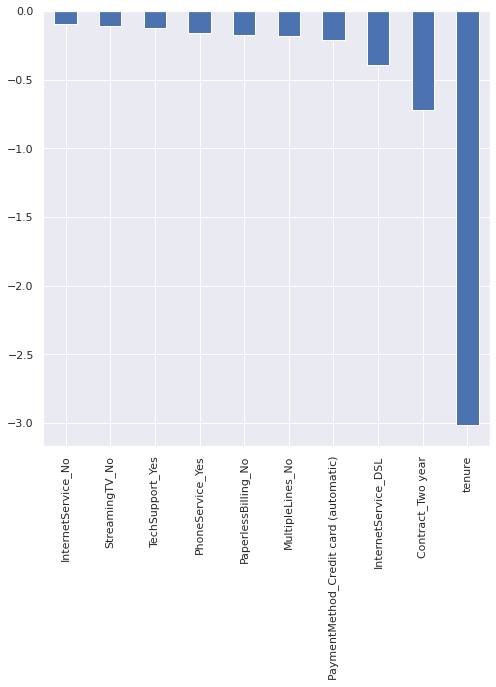

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7984386089425124


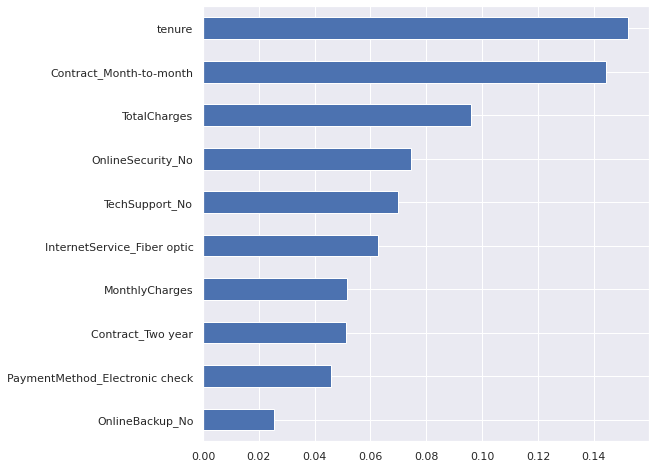

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7892122072391767

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[915 108]
 [189 197]]


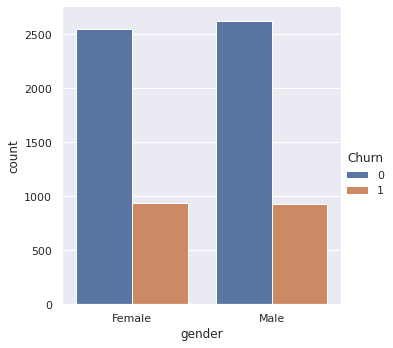

In [ ]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telco,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

## XG Boost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7984386089425124

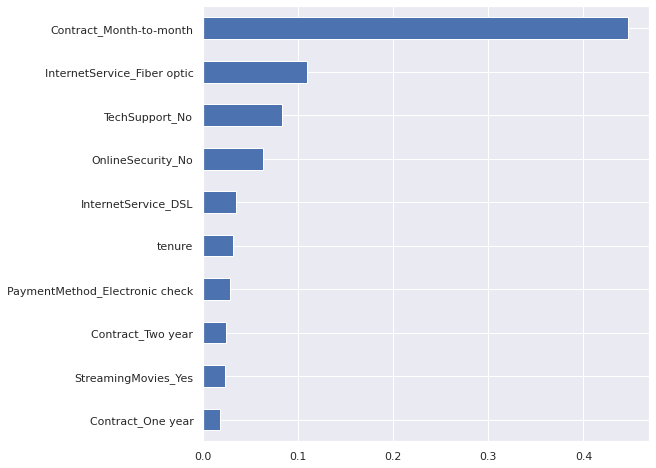

In [ ]:
importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')